<a href="https://colab.research.google.com/github/pschwartz222/MA-576/blob/main/Gradient_descent_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import sympy
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pylab
import math
from sympy import cos, sin, exp, Matrix, hessian, diff, symbols
import scipy as sp

In [ ]:
def first_quad_proj(p):
  a, b = p[:, 0]
  if all(p >= 0):
    proj = p
  else:
    if all(p < 0):
      proj = np.array([[0, 0]]).T
    else:
      if a < 0:
        proj = np.array([[0, b]]).T
      else:
        proj = np.array([[a, 0]]).T

  return(proj)

In [ ]:
def unit_sum_proj(p):
  a, b = p[:, 0]
  proj = np.array([[(1+a-b)/2, (1+b-a)/2]]).T
  return(proj)

In [ ]:
def unit_disk_proj(p):
  r = LA.norm(p)

  if r > 1:
    proj = (1/r)*p
  else:
    proj = p

  return(proj)

In [ ]:
p = np.array([[1, 1]]).T

print(first_quad_proj(p))
print(unit_sum_proj(p))
print(unit_disk_proj(p))

[[1]
 [1]]
[[0.5]
 [0.5]]
[[0.70710678]
 [0.70710678]]


In [ ]:
print(1/np.sqrt(2))

0.7071067811865475


In [ ]:
p = np.array([[1, -1]]).T

print(first_quad_proj(p))

[[1]
 [0]]


In [ ]:
def grad_descent_proj_arm(x_0, f, varis, tol, s, beta, sigma, N):
  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  num_f = sympy.lambdify(varis, f)
  num_grad = sympy.lambdify(varis, grad_f)


  #initialize
  if N == 0:
    x_it = first_quad_proj(x_0)
  if N == 1:
    x_it = unit_sum_proj(x_0)
  if N == 2:
    x_it = unit_disk_proj(x_0)


  a, b = x_it[:, 0]
  g = num_grad(a, b)

  X=[a]
  Y=[b]

  if N == 0:
    proj = first_quad_proj(x_it -s*g)
  if N == 1:
    proj = unit_sum_proj(x_it - s*g)
  if N == 2:
    proj = unit_disk_proj(x_it - s*g)

  D = proj - x_it

  err = math.inf
  it = 0

  while err > tol:

    #determine domain

    alpha = s
    x_next = x_it + alpha*D
    c, d = x_next[:, 0]
    k = 0
    while num_f(a,b) - num_f(c,d) < - sigma*alpha*(D.T @ g)[0][0]: #solve armijo line search to sufficiently shrink the step size alpha
      alpha = beta*alpha
      x_next = x_it + alpha*D
      c, d = x_next[:, 0]
      k = k+1

    #update itterates

    err = LA.norm(x_next - x_it)
    x_it = x_next
    a, b = x_it[:, 0]
    g = num_grad(a, b)

    if N == 0:
      proj = first_quad_proj(x_it -s*g)
    if N == 1:
      proj = unit_sum_proj(x_it - s*g)
    if N == 2:
      proj = unit_disk_proj(x_it - s*g)

    D = proj - x_it

    X.append(a)
    Y.append(b)

    it = it + 1

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_it.T)
  print('f(x*) =')
  print(num_f(a, b))
  print('|f(x*)| =', abs(num_f(a,b)))
  print()

  plt.figure()
  plt.plot(X, Y, label= 'itterates')
  plt.scatter(X, Y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('projection descent')
  plt.legend()
  plt.show()

In [ ]:
x, y = symbols('x y')

c = Matrix([[-1, -1]]).T

X = Matrix([[x, y]]).T

Q = Matrix([[2, -1], [-1, 1]])

f = ((X - c).T @ Q @ (X - c))[0]

print(f)

(-x + y)*(y + 1) + (x + 1)*(2*x - y + 1)


Number of iterations = 84
Approximate solution: x* = [[1.50114054e-10 6.26084789e-05]]
f(x*) =
1.000000004220031
|f(x*)| = 1.000000004220031



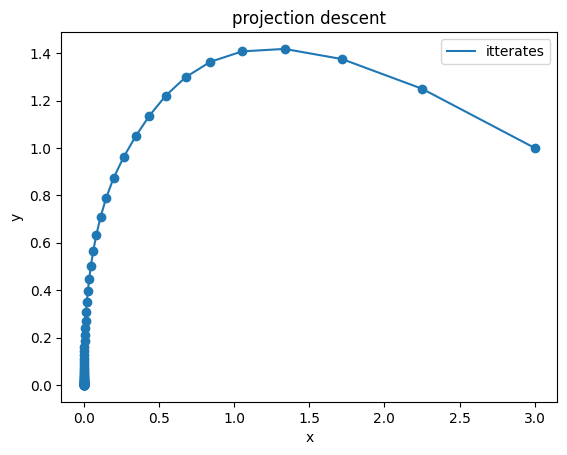

None
Number of iterations = 31
Approximate solution: x* = [[0.20001173 0.79998827]]
f(x*) =
1.8000000006882784
|f(x*)| = 1.8000000006882784



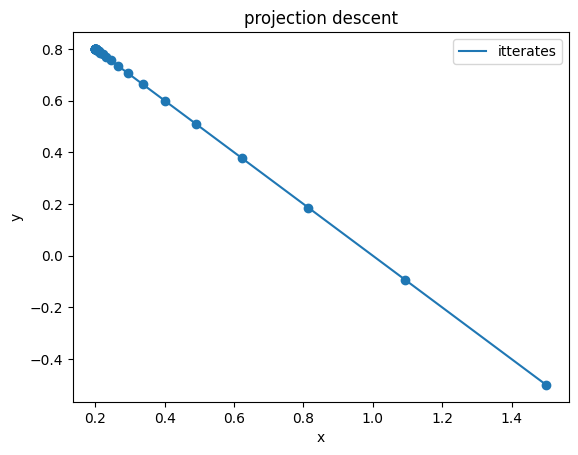

None
Number of iterations = 59
Approximate solution: x* = [[-0.76019949 -0.64966651]]
f(x*) =
0.06972182229553586
|f(x*)| = 0.06972182229553586



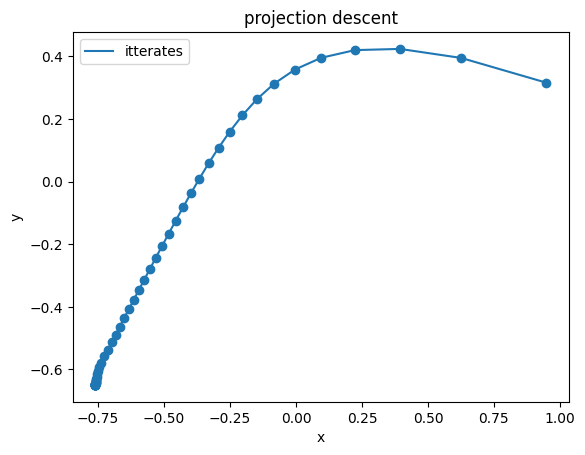

None


In [ ]:
x_0 = np.array([[3, 1]]).T
s = 1/4
beta = 1/2
sigma = 1/2

print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 0))
print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 1))
print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 2))

In [ ]:
c = Matrix([[1, 1]]).T

f = f = ((X - c).T @ Q @ (X - c))[0]

print(f)

(-x + y)*(y - 1) + (x - 1)*(2*x - y - 1)


Number of iterations = 176
Approximate solution: x* = [[1.00010071 1.00016295]]
f(x*) =
1.4016499114630305e-08
|f(x*)| = 1.4016499114630305e-08



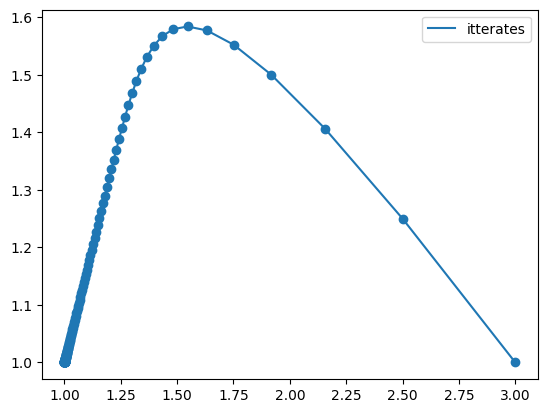

None
Number of iterations = 30
Approximate solution: x* = [[0.60001181 0.39998819]]
f(x*) =
0.20000000069793852
|f(x*)| = 0.20000000069793852



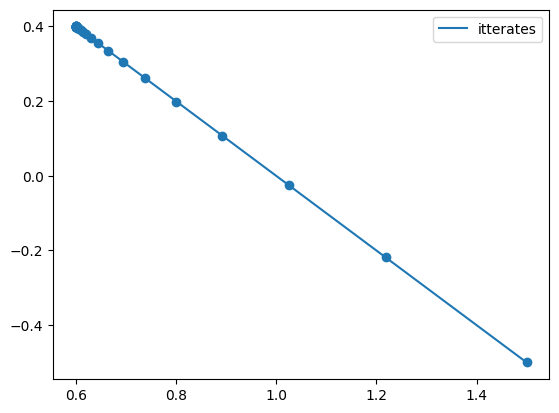

None
Number of iterations = 32
Approximate solution: x* = [[0.7602018  0.64966406]]
f(x*) =
0.06972176849162551
|f(x*)| = 0.06972176849162551



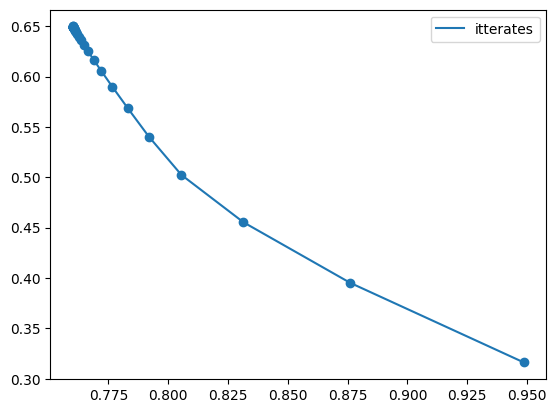

None


In [ ]:
x_0 = np.array([[3, 1]]).T
s = 1/4
beta = 1/2
sigma = 1/2

print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 0))
print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 1))
print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 2))

In [ ]:
c = Matrix([[1/2, -1]]).T

f = f = ((X - c).T @ Q @ (X - c))[0]

print(f)

(x - 0.5)*(2*x - y - 2.0) + (y + 1)*(-x + y + 1.5)


Number of iterations = 53
Approximate solution: x* = [[1.00003075e+00 4.11182415e-06]]
f(x*) =
0.5000041134795605
|f(x*)| = 0.5000041134795605



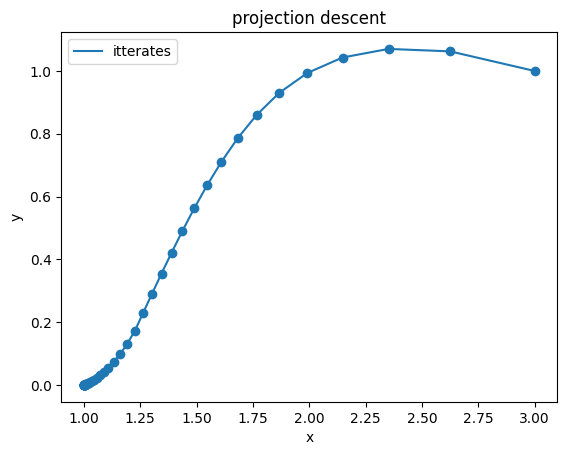

None
Number of iterations = 28
Approximate solution: x* = [[ 1.10001111 -0.10001111]]
f(x*) =
0.4500000006171082
|f(x*)| = 0.4500000006171082



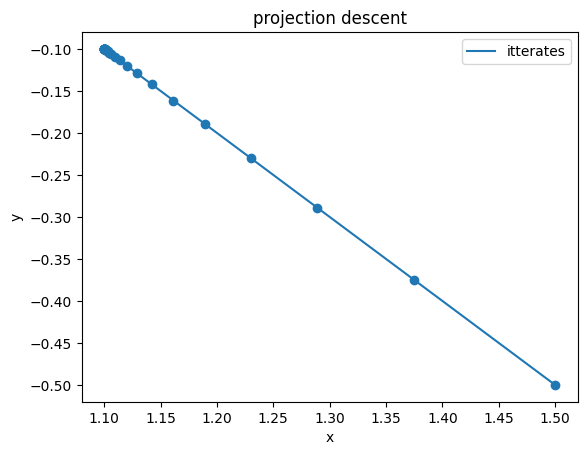

None
Number of iterations = 98
Approximate solution: x* = [[ 0.54188179 -0.84045471]]
f(x*) =
0.015598783316357926
|f(x*)| = 0.015598783316357926



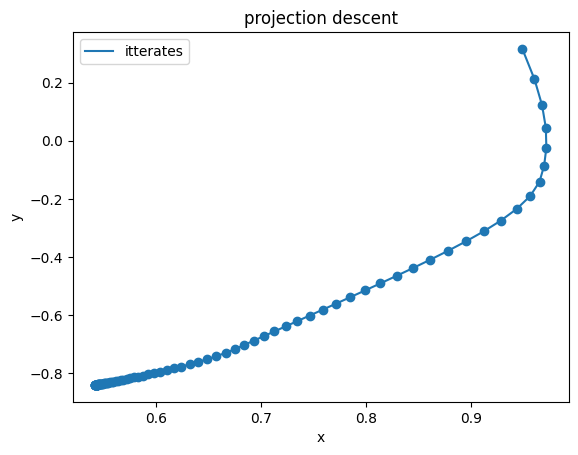

None


In [ ]:
x_0 = np.array([[3, 1]]).T
s = 1/4
beta = 1/2
sigma = 1/2

print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 0))
print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 1))
print(grad_descent_proj_arm(x_0, f, [x, y], 10**(-5), s, beta, sigma, 2))